In [43]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt

# Binomial Regression

### The aim of this notebook is to show how different log link function may affect the binomial regression result

Note: This notebook will only show that there exist more than one link function for the binomial regression parameter, and how to use the model in python

## Data

The dataset that is used here is a toy dataset to simplify the demonstration.

In [45]:
ice_cream = ['buy', 'buy', 'buy', 'buy', 'no', 'buy','no','no', 'no', 'no', 'no']
temp = [40, 33, 30, 25, 26, 23, 15, 12, 10, 3, 2]
data = pd.DataFrame([])
data['buy_ice_cream'] = ice_cream
data['temp'] = temp
data

,buy_ice_cream,temp
0,buy,40
1,buy,33
2,buy,30
3,buy,25
4,no,26
5,buy,23
6,no,15
7,no,12
8,no,10
9,no,3


Create an ice-cream dataset that explains the behaviour of a particular person in buying an ice-cream with temperature as its predictive attribute.

#### There are 3 link function that will be used here:
- Logit
- Complementary log-log
- Probit

## First Case: Set buy as positive (1) and no as negative (0)

In [80]:
# turn the categorical label to nominal first
y = data['buy_ice_cream'].apply(lambda x: 1 if x=='buy' else 0).values
# add constant here is adding the b0 constant (1 in all rows in the first column)
X = sm.add_constant(data['temp'])

In [81]:
X.head()

,const,temp
0,1.0,40
1,1.0,33
2,1.0,30
3,1.0,25
4,1.0,26


#### Logit

$$ \eta = log(\frac{p}{1-p}) $$
$$ p = \frac{exp(\eta)}{1+exp(\eta)}$$

In [82]:
binom_logit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit))
results_logit = binom_logit.fit()

/Users/nathanaelyoewono/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [83]:
print(results_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   11
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.6461
Date:                Wed, 07 Oct 2020   Deviance:                       5.2922
Time:                        20:22:42   Pearson chi2:                     4.81
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0131      5.937     -1.350      0.1

In [84]:
b0_logit, b1_logit = results_logit.params.values
print('Parameter Result: ')
print('b0:', b0_logit)
print('b1:', b1_logit)

Parameter Result: 
b0: -8.013093042909896
b1: 0.3540232537745974


#### Complementary log-log
$$ \eta = log(-log(1-p)) $$
$$ p = 1-exp(e^{\eta})$$

In [85]:
binom_cloglog = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.cloglog))
results_cloglog = binom_cloglog.fit()

/Users/nathanaelyoewono/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [86]:
print(results_cloglog.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   11
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            1
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.7126
Date:                Wed, 07 Oct 2020   Deviance:                       5.4251
Time:                        20:23:03   Pearson chi2:                     4.53
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0431      3.940     -1.534      0.1

In [87]:
b0_cloglog, b1_cloglog = results_cloglog.params.values
print('Parameter Result: ')
print('b0:', b0_cloglog)
print('b1:', b1_cloglog)

Parameter Result: 
b0: -6.043087002687001
b1: 0.2416020667944327


#### Probit:
$$ \eta = \phi^{-1}(p) $$
$$ p = \phi(\eta)$$

$\phi$ here is the cumulative distribution function (cdf) of the standard normal distribution (Z ~ N(0, 1))

$$ \phi(x) = P(Z \leq x) = \frac{erf(\frac{x}{\sqrt{2}}+1)}{2} $$
erf = Gaussian error function (https://en.wikipedia.org/wiki/Error_function)

In [88]:
binom_probit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.probit))
results_probit = binom_probit.fit()

/Users/nathanaelyoewono/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [89]:
print(results_probit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   11
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            1
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.5826
Date:                Wed, 07 Oct 2020   Deviance:                       5.1651
Time:                        20:23:21   Pearson chi2:                     4.61
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7260      3.138     -1.506      0.1

In [90]:
b0_probit, b1_probit = results_probit.params.values
print('Parameter Result: ')
print('b0:', b0_probit)
print('b1:', b1_probit)

Parameter Result: 
b0: -4.725956888274586
b1: 0.20836955682493538


### Plot result

In [91]:
def eta(b0, b1, x):
    return b0+b1*x

In [92]:
# get one prediction too
check_temp = 29
pred_logit = np.exp(eta(b0_logit, b1_logit, check_temp))/(1+np.exp(eta(b0_logit, b1_logit, check_temp)))
pred_cloglog = 1-np.exp(-1*np.exp(eta(b0_cloglog, b1_cloglog, check_temp)))
pred_probit = norm.cdf(eta(b0_probit, b1_probit, check_temp))

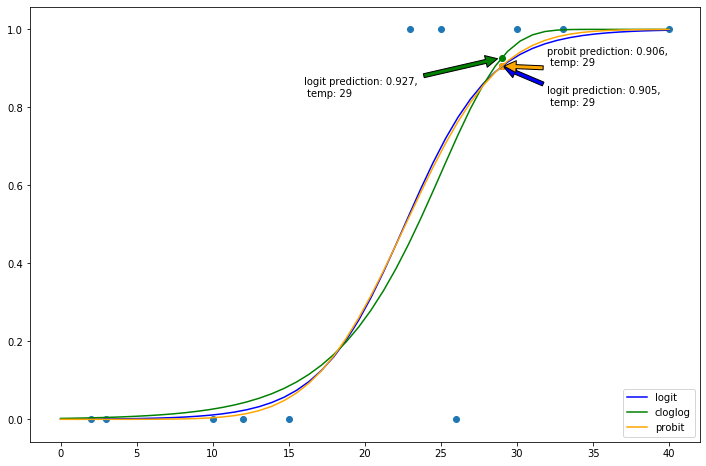

In [93]:
plt.figure(figsize=(12, 8))
x = np.linspace(0, 40)

# data points
plt.scatter(x=X.temp, y=y)

# logit
eta_logit = eta(b0_logit, b1_logit, x)
p_logit = np.exp(eta_logit)/(1+np.exp(eta_logit))
plt.plot(x, p_logit, label='logit', c='b')

# cloglog
eta_cloglog = eta(b0_cloglog, b1_cloglog, x)
p_cloglog = 1-np.exp(-1*np.exp(eta_cloglog))
plt.plot(x, p_cloglog, label='cloglog', c='g')

# probit
eta_probit =eta(b0_probit, b1_probit, x)
p_probit = norm.cdf(eta_probit)
plt.plot(x, p_probit, label='probit', c='orange')

plt.scatter(check_temp, pred_logit, c='b')
plt.scatter(check_temp, pred_cloglog, c='g')
plt.scatter(check_temp, pred_probit, c='orange')

plt.annotate(f'logit prediction: {round(pred_logit, 3)},\n temp: {check_temp}', xy=(check_temp, pred_logit), 
             xytext=(32, pred_logit-0.1), 
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'probit prediction: {round(pred_probit, 3)},\n temp: {check_temp}', xy=(check_temp, pred_probit), 
             xytext=(32, pred_probit), 
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate(f'logit prediction: {round(pred_cloglog, 3)},\n temp: {check_temp}', xy=(check_temp, pred_cloglog), 
             xytext=(16, pred_cloglog-0.1), 
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.legend(loc='lower right')
plt.title('First Case Binomial Regression')
plt.show()

Notice that each link function may have different curve, where cloglog may have the steepest curve compared to the other link function. Each link function prediction also have different result. It seems the annotated outliers in temperature 26 may produce different behaviour in each link function.

## Second Case: Set buy as positive (0) and no as negative (1)

In [95]:
y = data['buy_ice_cream'].apply(lambda x: 0 if x=='buy' else 1).values

In [96]:
binom_logit_2 = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit))
results_logit_2 = binom_logit_2.fit()
b0_logit_2, b1_logit_2 = results_logit_2.params.values

binom_cloglog_2 = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.cloglog))
results_cloglog_2 = binom_cloglog_2.fit()
b0_cloglog_2, b1_cloglog_2 = results_cloglog_2.params.values

binom_probit_2 = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.probit))
results_probit_2 = binom_probit_2.fit()
b0_probit_2, b1_probit_2 = results_probit_2.params.values

/Users/nathanaelyoewono/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.
/Users/nathanaelyoewono/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """
/Users/nathanaelyoewono/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nathanaelyoewono/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  if __name__ == '__main__':


In [97]:
# get one prediction too
check_temp = 29
pred_logit_2 = np.exp(eta(b0_logit_2, b1_logit_2, check_temp))/(1+np.exp(eta(b0_logit_2, b1_logit_2, check_temp)))
pred_cloglog_2 = 1-np.exp(-1*np.exp(eta(b0_cloglog_2, b1_cloglog_2, check_temp)))
pred_probit_2 = norm.cdf(eta(b0_probit_2, b1_probit_2, check_temp))

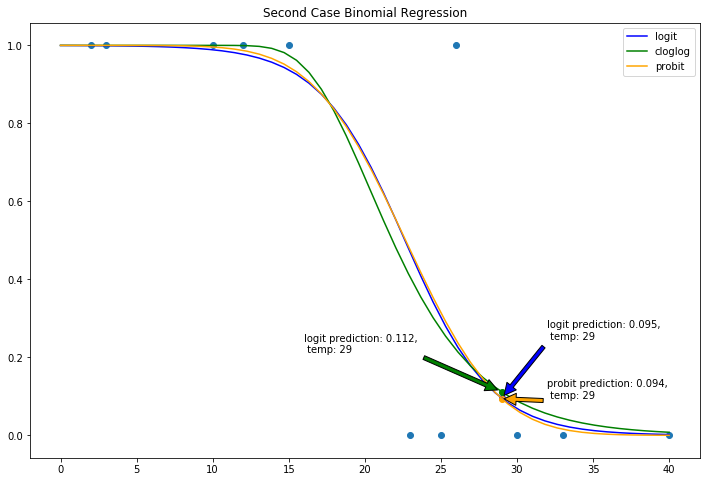

In [104]:
plt.figure(figsize=(12, 8))
x = np.linspace(0, 40)

# data points
plt.scatter(x=X.temp, y=y)

# logit
eta_logit = eta(b0_logit_2, b1_logit_2, x)
p_logit = np.exp(eta_logit)/(1+np.exp(eta_logit))
plt.plot(x, p_logit, label='logit', c='b')

# cloglog
eta_cloglog = eta(b0_cloglog_2, b1_cloglog_2, x)
p_cloglog = 1-np.exp(-1*np.exp(eta_cloglog))
plt.plot(x, p_cloglog, label='cloglog', c='g')

# probit
eta_probit = eta(b0_probit_2, b1_probit_2, x)
p_probit = norm.cdf(eta_probit)
plt.plot(x, p_probit, label='probit', c='orange')

plt.scatter(check_temp, pred_logit_2, c='b')
plt.scatter(check_temp, pred_cloglog_2, c='g')
plt.scatter(check_temp, pred_probit_2, c='orange')

plt.annotate(f'logit prediction: {round(pred_logit_2, 3)},\n temp: {check_temp}', xy=(check_temp, pred_logit_2), 
             xytext=(32, pred_logit_2+0.15), 
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'probit prediction: {round(pred_probit_2, 3)},\n temp: {check_temp}', xy=(check_temp, pred_probit_2), 
             xytext=(32, pred_probit_2), 
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate(f'logit prediction: {round(pred_cloglog_2, 3)},\n temp: {check_temp}', xy=(check_temp, pred_cloglog_2), 
             xytext=(16, pred_cloglog_2+0.1), 
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.legend(loc='upper right')
plt.title('Second Case Binomial Regression')
plt.show()

Intuitively, the probability should just be 1-p(case=1). To be sure, let's check the value.

In [106]:
p_case_1 = [pred_logit, pred_cloglog, pred_probit]
p_case_2 = [1-pred_logit_2, 1-pred_cloglog_2, 1-pred_probit_2]
df = pd.DataFrame([])
df['Case_1'] = p_case_1
df['Case_2'] = p_case_2
df.index = ['Logit', 'Cloglog', 'Probit']
df

,Case_1,Case_2
Logit,0.904959,0.904959
Cloglog,0.927235,0.888430
Probit,0.906041,0.906041


As you can see, the probability change when using the cloglog as the link function. Thus, changing the definition of success in cloglog may result in different probability. This is one of Cloglog's drawback.

### Conclusion:
- Cloglog's curve may be more steeper compared to the other link function.
- Probit and logit may have similar curve form. (https://www.johndcook.com/blog/2010/05/18/normal-approximation-to-logistic/)
- Changing the definition of success in cloglog may change the result of the estimated y-values.
- All of these link function have similar prediction result (each deviation may not be significant).
- If in doubt, just use logit function :)